In [16]:
import pandas as pd

In [17]:
import numpy as np

In [18]:
df_yes = pd.read_csv('final_lq_yes.csv')
df_no = pd.read_csv('final_lq_no.csv')

In [19]:
df_yes

,Unnamed: 0,dong,quarter,food_service_lq,retail_lq,franchise_lq,youth_sales_lq,total_net_growth_rate
0,0,송파구 위례동,20211,0.792873,0.749729,2.219522,1.386906,540.000000
1,1,송파구 위례동,20212,0.823023,0.726397,2.158903,1.543515,310.000000
2,2,송파구 위례동,20213,0.824284,0.724618,2.208791,1.575277,150.000000
3,3,송파구 위례동,20214,0.817079,0.723398,2.043944,1.525161,810.000000
4,4,송파구 위례동,20221,0.819005,0.716322,2.075974,1.434589,23.076923
...,...,...,...,...,...,...,...,...
5899,5899,송파구 잠실7동,20233,0.311888,1.259296,0.875081,0.997117,20.000000
5900,5900,강남구 개포1동,20234,0.336526,1.338416,0.609471,0.385341,-60.000000
5901,5901,강남구 개포1동,20242,0.359586,1.363864,0.433076,1.014300,0.000000
5902,5902,송파구 잠실7동,20241,0.295795,1.323843,0.847616,0.761001,-66.666667


In [20]:
df_yes = df_yes.drop(columns=['Unnamed: 0'])

In [21]:
df_yes

,dong,quarter,food_service_lq,retail_lq,franchise_lq,youth_sales_lq,total_net_growth_rate
0,송파구 위례동,20211,0.792873,0.749729,2.219522,1.386906,540.000000
1,송파구 위례동,20212,0.823023,0.726397,2.158903,1.543515,310.000000
2,송파구 위례동,20213,0.824284,0.724618,2.208791,1.575277,150.000000
3,송파구 위례동,20214,0.817079,0.723398,2.043944,1.525161,810.000000
4,송파구 위례동,20221,0.819005,0.716322,2.075974,1.434589,23.076923
...,...,...,...,...,...,...,...
5899,송파구 잠실7동,20233,0.311888,1.259296,0.875081,0.997117,20.000000
5900,강남구 개포1동,20234,0.336526,1.338416,0.609471,0.385341,-60.000000
5901,강남구 개포1동,20242,0.359586,1.363864,0.433076,1.014300,0.000000
5902,송파구 잠실7동,20241,0.295795,1.323843,0.847616,0.761001,-66.666667


In [22]:
df_no

,quarter,dong,pop_total,pop_floating,rent_lq,facility_lq
0,20224,강남구 개포1동,6899.666667,1627165,NaN,0.969116
1,20224,강남구 개포2동,28589.000000,3195304,1.407856,0.830912
2,20224,강남구 개포3동,11585.666670,1943547,1.826945,1.002405
3,20224,강남구 개포4동,23523.666670,2600988,0.677367,0.860227
4,20224,강남구 논현1동,21499.000000,9066882,1.257756,2.455406
...,...,...,...,...,...,...
5945,20223,중랑구 상봉2동,20191.666670,4942725,0.610354,1.112265
5946,20223,중랑구 신내1동,38241.666670,4876744,0.736181,0.739877
5947,20223,중랑구 신내2동,20130.000000,2200866,0.894431,0.913621
5948,20223,중랑구 중화1동,19304.666670,1854276,0.550375,0.723671


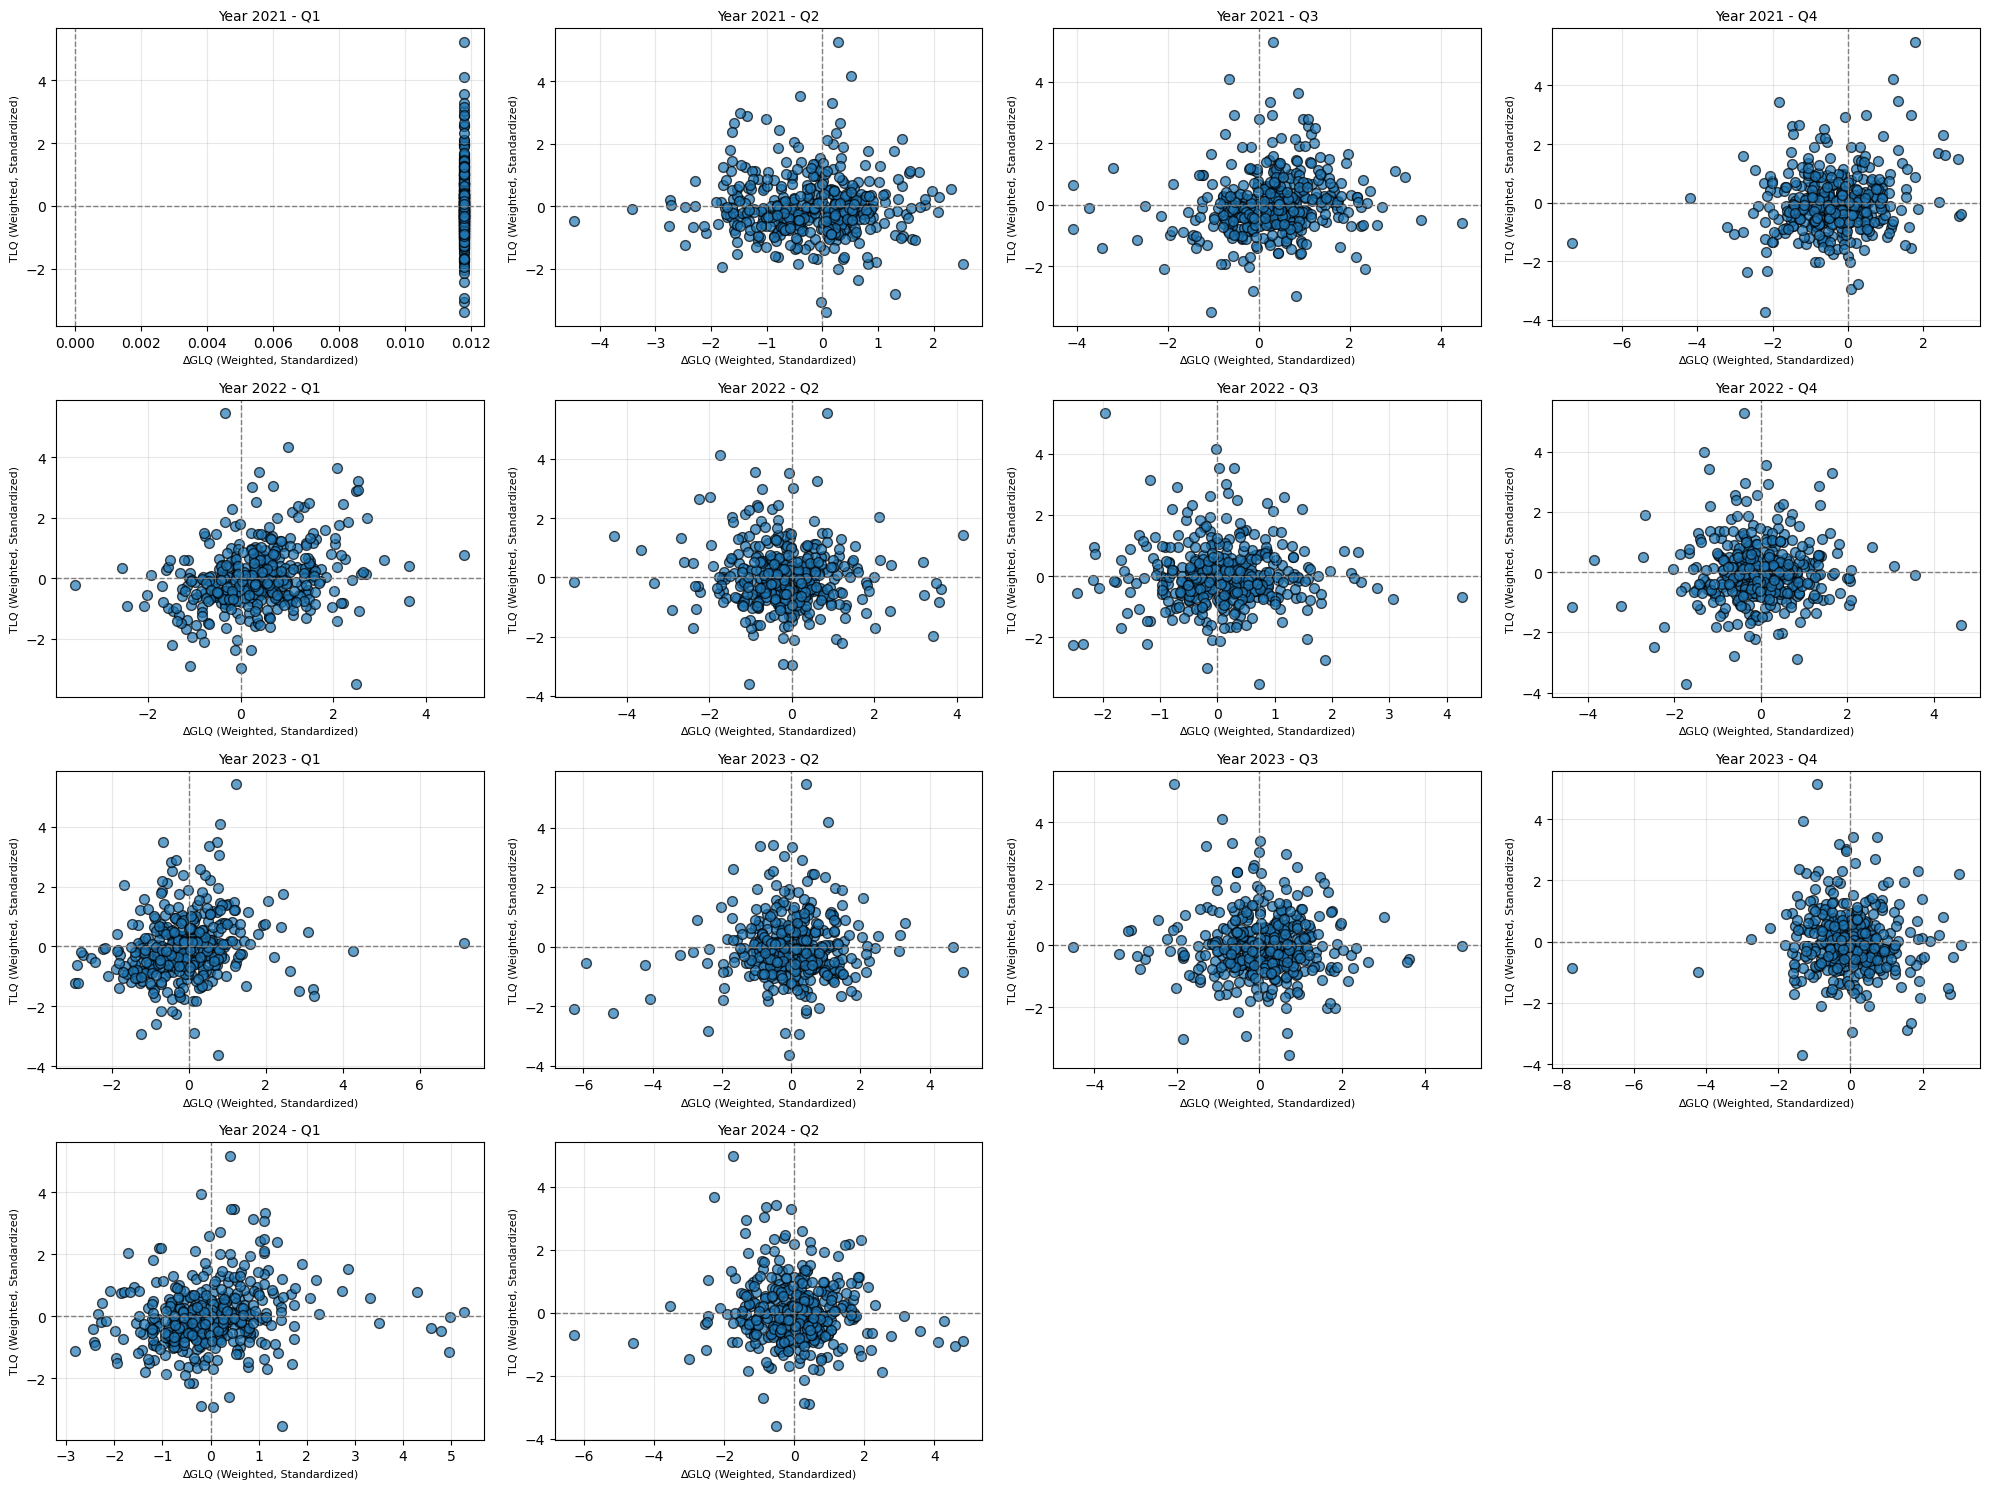

In [36]:
# 상주인구와 유입인구를 고려한 GLQ 계산
for col in lq_columns:
    merged_df_sorted[f'{col}_weighted'] = (
        (merged_df_sorted[col] * merged_df_sorted['pop_total'] + 
         merged_df_sorted[col] * merged_df_sorted['pop_floating']) /
        (merged_df_sorted['pop_total'] + merged_df_sorted['pop_floating'])
    )

# Weighted GLQ 계산
weighted_columns = [f'{col}_weighted' for col in lq_columns]
merged_df_sorted['delta_glq_weighted'] = merged_df_sorted.groupby('dong')[weighted_columns].diff().sum(axis=1)

# Weighted TLQ 계산
merged_df_sorted['tlq_weighted'] = merged_df_sorted[weighted_columns].sum(axis=1)

# Standardize the new GLQ and TLQ
scaler = StandardScaler()
merged_df_sorted[['delta_glq_weighted', 'tlq_weighted']] = scaler.fit_transform(
    merged_df_sorted[['delta_glq_weighted', 'tlq_weighted']]
)

# Visualization
plt.figure(figsize=(20, 15))
for i, year in enumerate(sorted(unique_years)):
    for j, qtr in enumerate(sorted(unique_quarters)):
        data = merged_df_sorted[(merged_df_sorted['year'] == year) & (merged_df_sorted['qtr'] == qtr)]
        if not data.empty:
            plt.subplot(len(unique_years), len(unique_quarters), i * len(unique_quarters) + j + 1)
            plt.scatter(data['delta_glq_weighted'], data['tlq_weighted'], alpha=0.7, edgecolors='k', s=50)
            plt.title(f'Year {year} - Q{qtr}', fontsize=10)
            plt.xlabel('∆GLQ (Weighted, Standardized)', fontsize=8)
            plt.ylabel('TLQ (Weighted, Standardized)', fontsize=8)
            plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
            plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
            plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [37]:
merged_df

,dong,quarter,food_service_lq,retail_lq,franchise_lq,youth_sales_lq,total_net_growth_rate,pop_total,pop_floating,rent_lq,facility_lq
0,송파구 위례동,20211,0.792873,0.749729,2.219522,1.386906,540.000000,31694.666670,3320137,1.280645,0.476463
1,송파구 위례동,20212,0.823023,0.726397,2.158903,1.543515,310.000000,32231.666670,4081606,1.330059,0.465689
2,송파구 위례동,20213,0.824284,0.724618,2.208791,1.575277,150.000000,34703.666670,4123570,1.278475,0.431770
3,송파구 위례동,20214,0.817079,0.723398,2.043944,1.525161,810.000000,38406.333330,4418806,1.317767,0.388957
4,송파구 위례동,20221,0.819005,0.716322,2.075974,1.434589,23.076923,40988.666670,4050240,1.331280,0.363534
...,...,...,...,...,...,...,...,...,...,...,...
5895,송파구 잠실7동,20233,0.311888,1.259296,0.875081,0.997117,20.000000,9424.666667,1413129,NaN,0.558859
5896,강남구 개포1동,20234,0.336526,1.338416,0.609471,0.385341,-60.000000,8628.333333,2037706,NaN,0.771822
5897,강남구 개포1동,20242,0.359586,1.363864,0.433076,1.014300,0.000000,24733.000000,3900072,NaN,0.268677
5898,송파구 잠실7동,20241,0.295795,1.323843,0.847616,0.761001,-66.666667,9426.000000,1391744,NaN,0.557345


In [38]:
df_yes_sorted = df_yes[df_yes['dong'] == '구로구 항동'].sort_values(by='quarter')

df_yes_sorted['youth_sales_lq'] = df_yes_sorted['youth_sales_lq'].bfill().ffill()

df_yes.loc[df_yes_sorted.index, 'youth_sales_lq'] = df_yes_sorted['youth_sales_lq']

In [39]:
df_yes_filtered = df_yes[df_yes['dong'] == '구로구 항동']

In [40]:
df_yes_filtered

,dong,quarter,food_service_lq,retail_lq,franchise_lq,youth_sales_lq,total_net_growth_rate
17,구로구 항동,20242,0.705071,0.802273,2.183577,0.952465,12.500000
19,구로구 항동,20233,0.675757,0.762205,2.224164,0.952607,-28.571429
20,구로구 항동,20234,0.711059,0.767895,2.204332,0.874421,8.000000
21,구로구 항동,20232,0.663432,0.761164,2.131971,0.816440,25.000000
35,구로구 항동,20231,0.651945,0.770050,2.076995,0.932000,-15.000000
36,구로구 항동,20224,0.650805,0.742156,2.009259,0.836982,78.947368
83,구로구 항동,20223,0.681606,0.722369,2.047266,1.097780,33.333333
104,구로구 항동,20222,0.682758,0.757428,2.082158,0.850966,60.000000
5854,구로구 항동,20241,0.738086,0.774875,2.151492,0.952465,-225.000000
5855,구로구 항동,20221,0.608798,0.814156,2.021072,0.850966,1100.000000


In [41]:
df_yes = df_yes_filtered

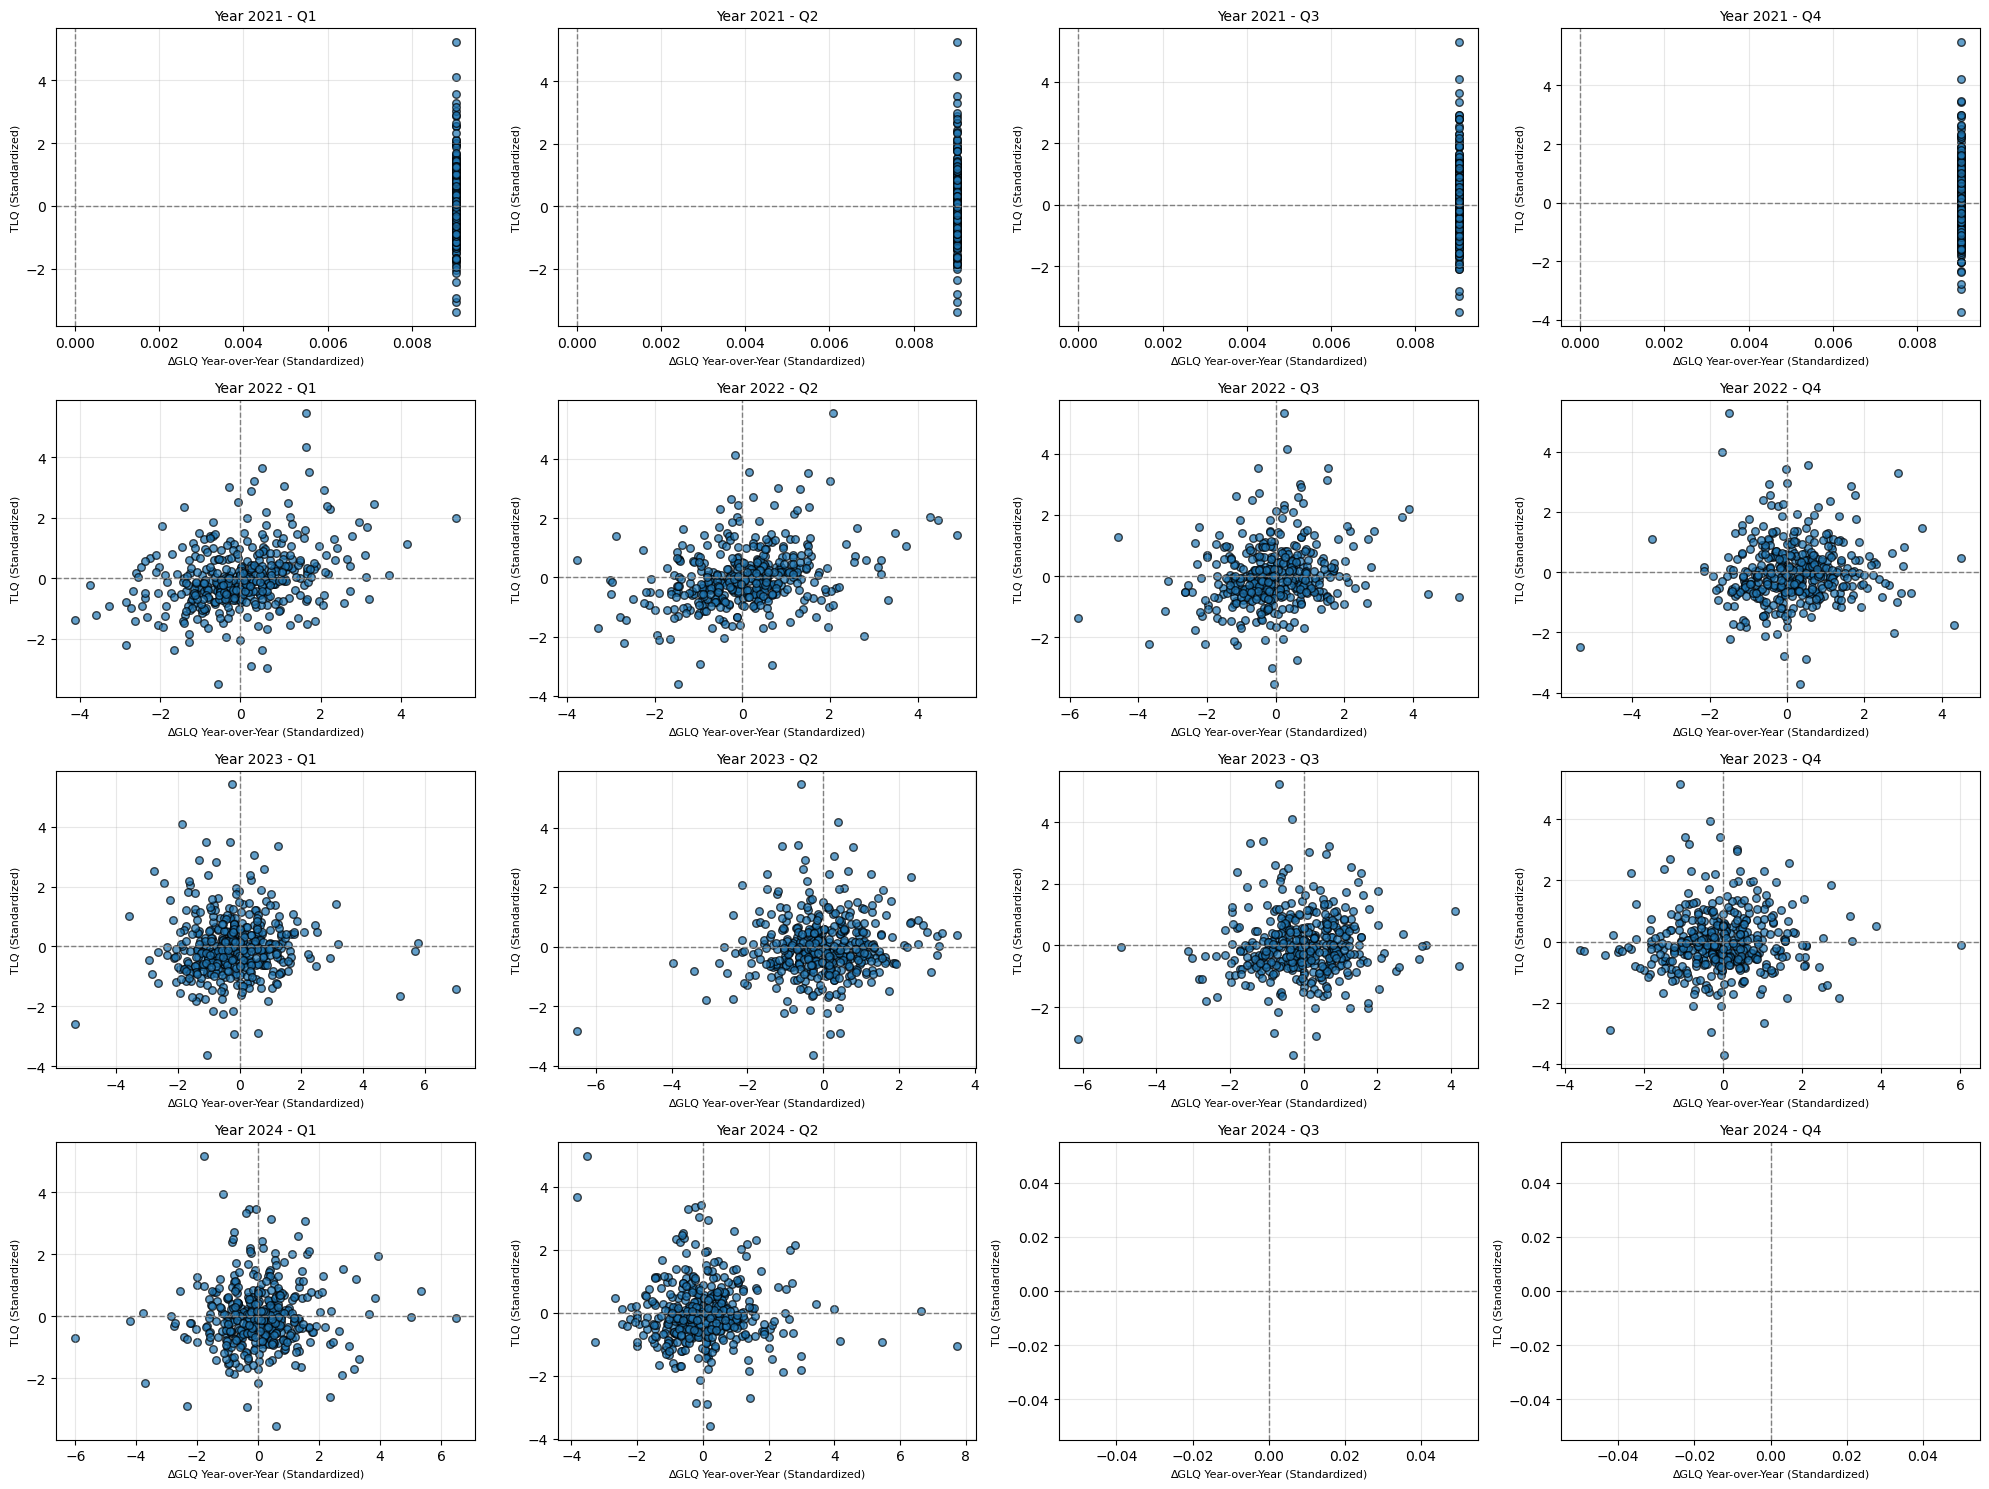

In [42]:
# Calculate year-over-year differences for delta_glq
for col in lq_columns:
    merged_df_sorted[f'delta_{col}_year'] = merged_df_sorted.groupby(['dong', 'qtr'])[col].diff()

# Calculate total year-over-year GLQ changes
delta_year_columns = [f'delta_{col}_year' for col in lq_columns]
merged_df_sorted['delta_glq_year'] = merged_df_sorted[delta_year_columns].sum(axis=1)

# Standardize delta_glq_year and tlq
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_df_sorted[['delta_glq_year', 'tlq']] = scaler.fit_transform(merged_df_sorted[['delta_glq_year', 'tlq']])

# Visualization
import matplotlib.pyplot as plt

merged_df_sorted['year'] = merged_df_sorted['quarter'] // 10
merged_df_sorted['qtr'] = merged_df_sorted['quarter'] % 10

unique_years = merged_df_sorted['year'].unique()
unique_quarters = merged_df_sorted['qtr'].unique()

plt.figure(figsize=(20, 15))

for i, year in enumerate(sorted(unique_years)):
    for j, qtr in enumerate(sorted(unique_quarters)):
        plt.subplot(len(unique_years), len(unique_quarters), i * len(unique_quarters) + j + 1)
        data = merged_df_sorted[(merged_df_sorted['year'] == year) & (merged_df_sorted['qtr'] == qtr)]
        plt.scatter(data['delta_glq_year'], data['tlq'], alpha=0.7, edgecolors='k', s=30) 
        plt.title(f'Year {year} - Q{qtr}', fontsize=10)
        plt.xlabel('∆GLQ Year-over-Year (Standardized)', fontsize=8)
        plt.ylabel('TLQ (Standardized)', fontsize=8)
        plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
        plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


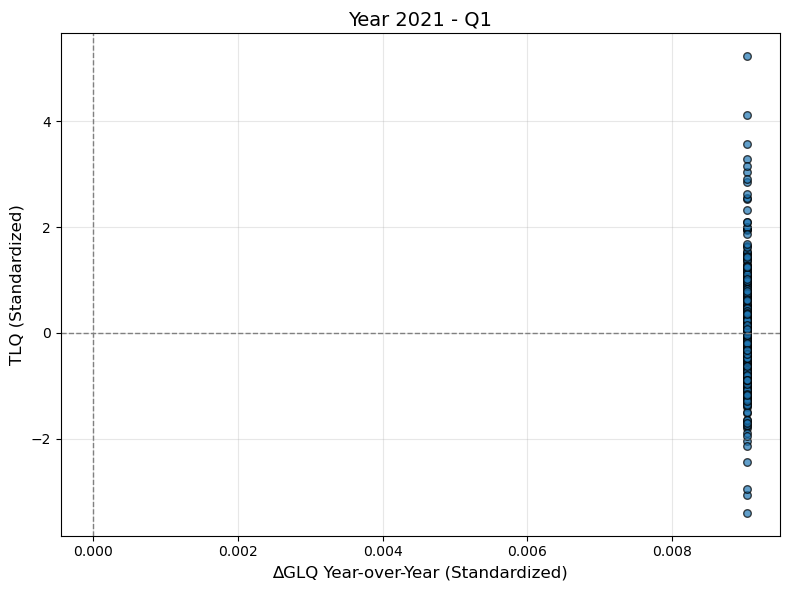

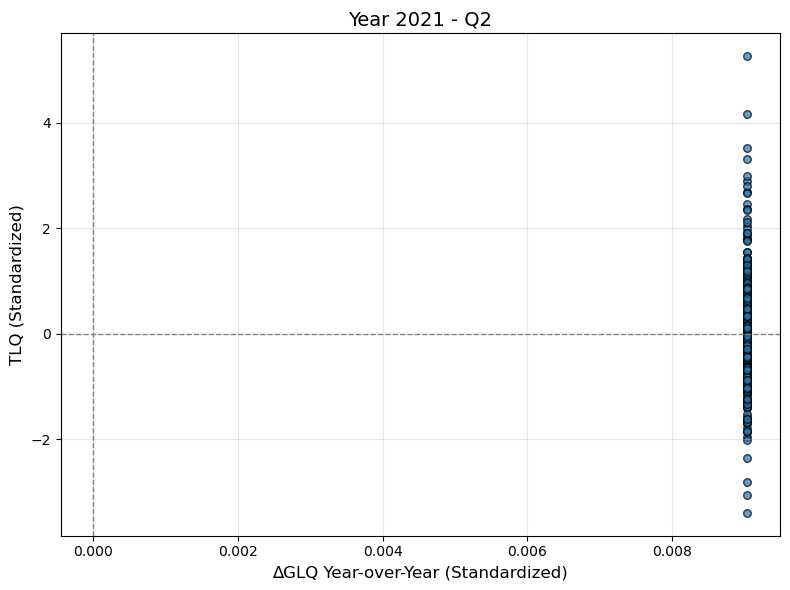

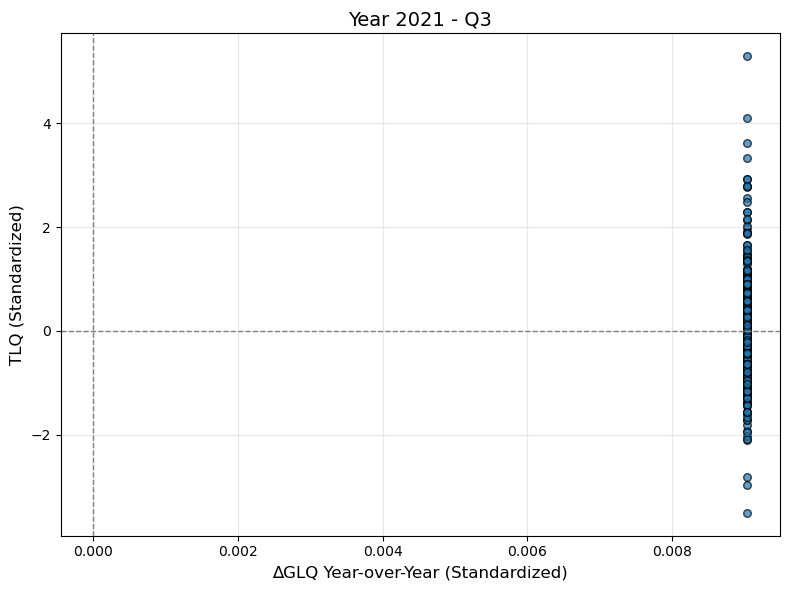

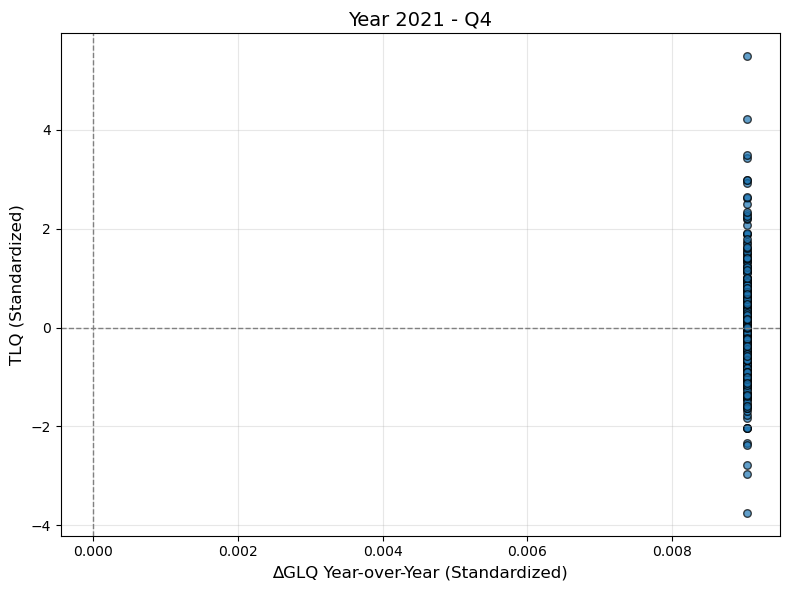

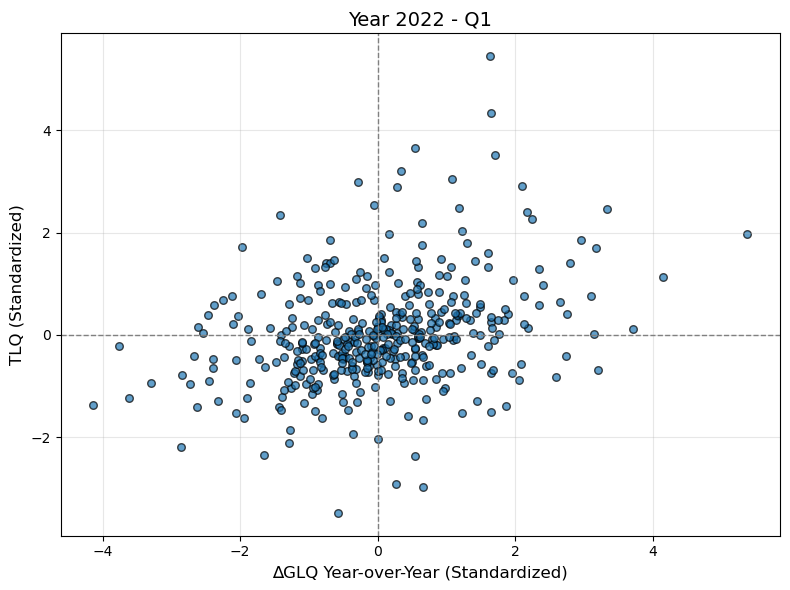

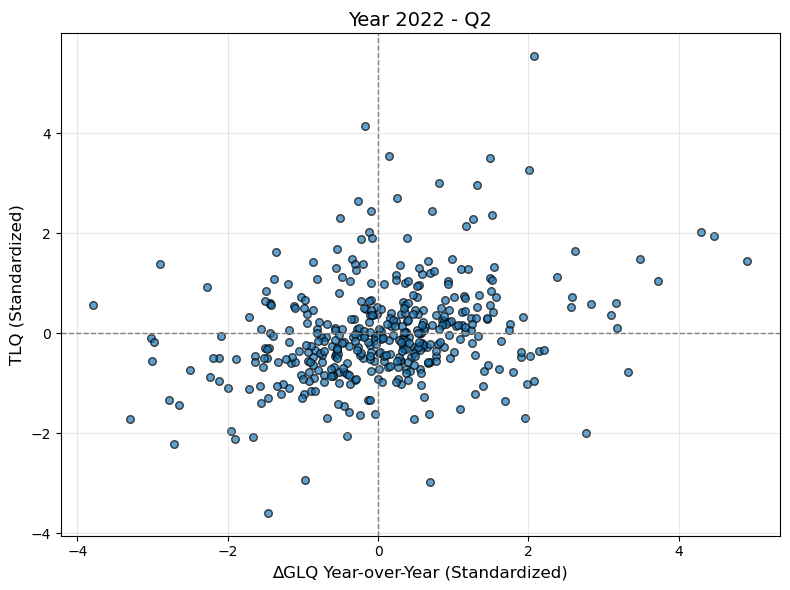

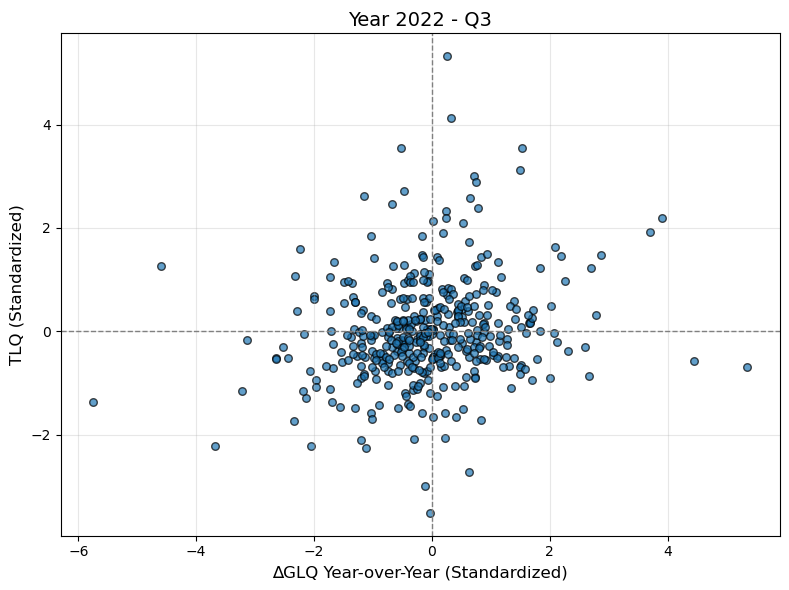

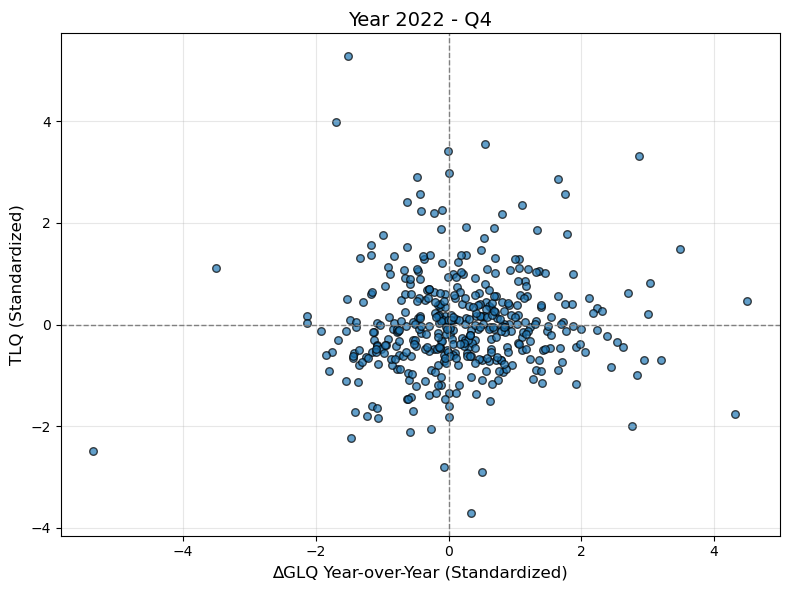

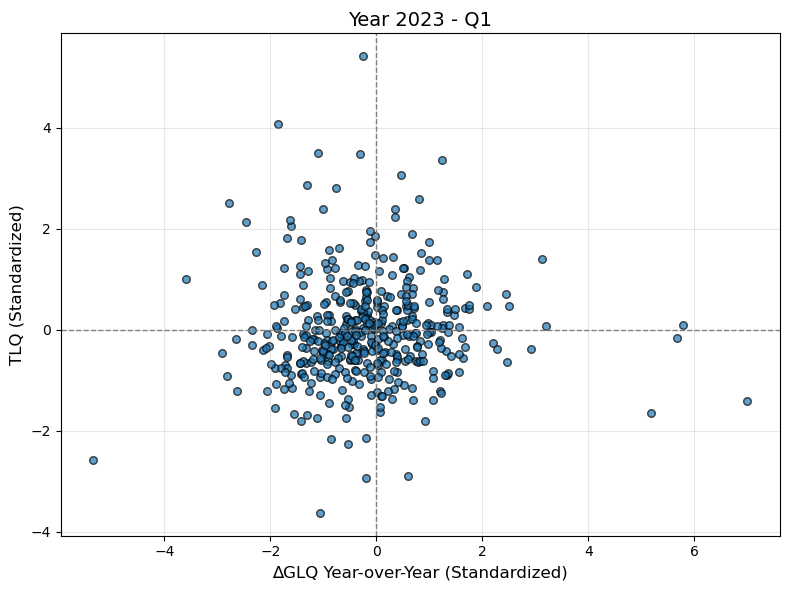

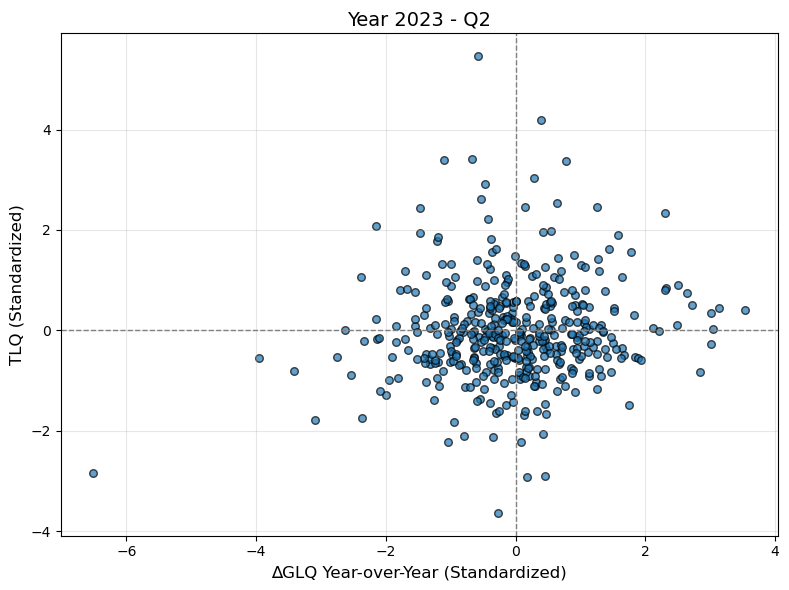

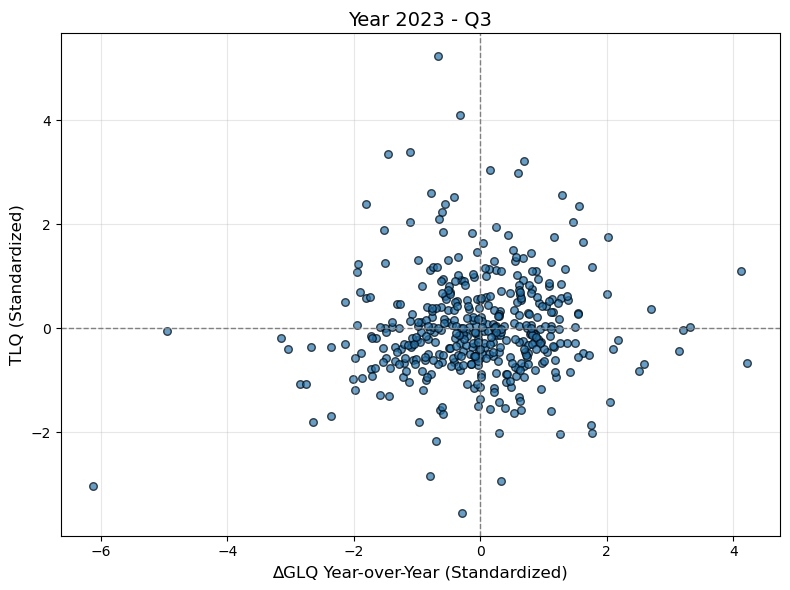

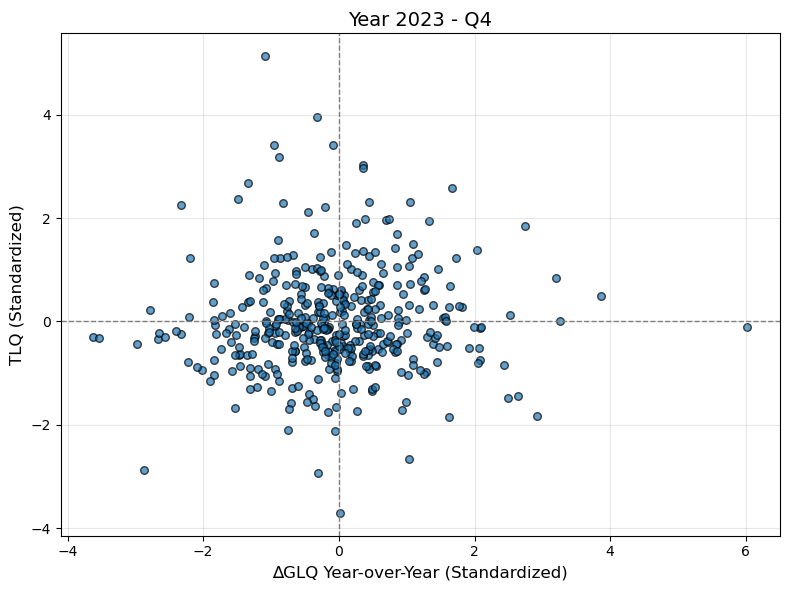

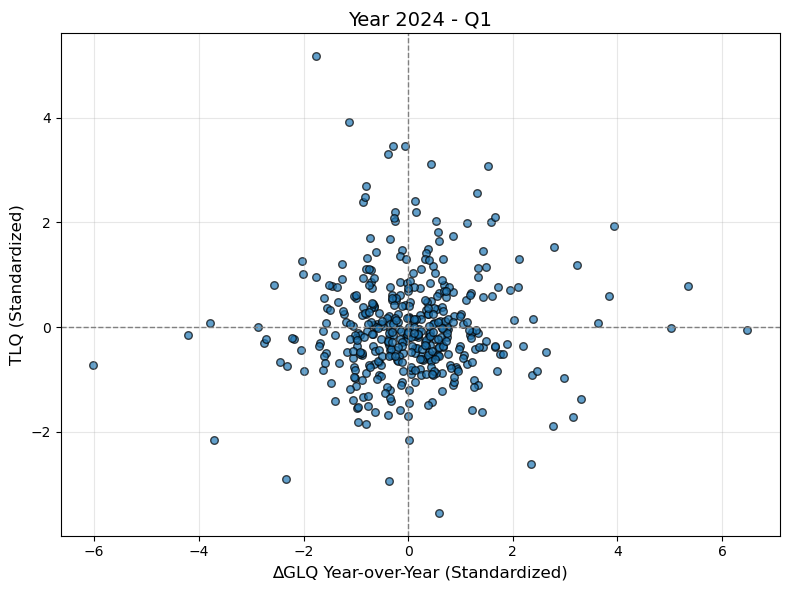

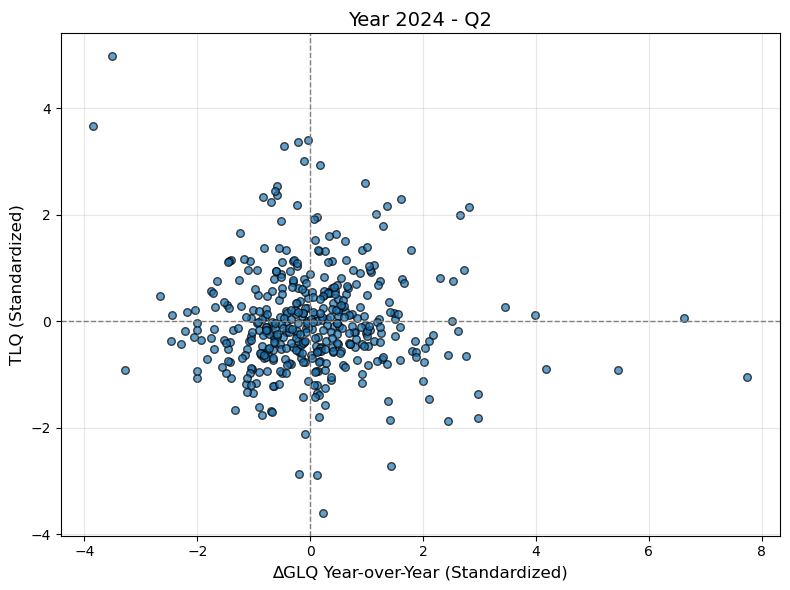

In [43]:
import matplotlib.pyplot as plt

# Create separate figures for each quarter within each year
for year in sorted(unique_years):
    for qtr in sorted(unique_quarters):
        data = merged_df_sorted[(merged_df_sorted['year'] == year) & (merged_df_sorted['qtr'] == qtr)]
        
        if not data.empty:  # Proceed only if there is data for the current year and quarter
            plt.figure(figsize=(8, 6))
            plt.scatter(data['delta_glq_year'], data['tlq'], alpha=0.7, edgecolors='k', s=30)
            plt.title(f'Year {year} - Q{qtr}', fontsize=14)
            plt.xlabel('∆GLQ Year-over-Year (Standardized)', fontsize=12)
            plt.ylabel('TLQ (Standardized)', fontsize=12)
            plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
            plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()



In [33]:
merged_df_sorted

,dong,quarter,food_service_lq,retail_lq,franchise_lq,youth_sales_lq,total_net_growth_rate,pop_total,pop_floating,rent_lq,...,delta_youth_sales_lq,delta_glq,tlq,year,qtr,delta_food_service_lq_year,delta_retail_lq_year,delta_franchise_lq_year,delta_youth_sales_lq_year,delta_glq_year
5873,강남구 개포1동,20211,0.322794,1.367586,0.449849,0.012391,100.000000,6595.666667,1198678,0.658413,...,NaN,0.011791,-2.431097,2021,1,NaN,NaN,NaN,NaN,0.009039
5874,강남구 개포1동,20212,0.324895,1.385343,0.457482,0.035535,0.000000,6485.333333,1444884,0.634918,...,0.023144,0.643484,-2.362266,2021,2,NaN,NaN,NaN,NaN,0.009039
5875,강남구 개포1동,20213,0.332385,1.423029,0.470758,0.162198,-25.000000,6431.666667,1414204,0.923505,...,0.126663,2.321257,-2.110619,2021,3,NaN,NaN,NaN,NaN,0.009039
5876,강남구 개포1동,20214,0.322858,1.381957,0.461018,0.049910,800.000000,6398.000000,1505736,0.881427,...,-0.112288,-2.141867,-2.345288,2021,4,NaN,NaN,NaN,NaN,0.009039
5877,강남구 개포1동,20221,0.328798,1.380413,0.471812,0.024090,-500.000000,6841.666667,1340576,0.962442,...,-0.025820,-0.120826,-2.359739,2022,1,0.006004,0.012827,0.021963,0.011699,0.535090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,중랑구 중화2동,20232,1.285877,1.023779,0.847637,0.854880,-270.000000,24255.333330,3090288,0.613090,...,-0.039934,-0.458232,0.096793,2023,2,0.040648,-0.041522,-0.015690,-0.022902,-0.386467
2083,중랑구 중화2동,20233,1.280626,1.005959,0.812730,0.909351,-155.555556,24025.333330,2948221,0.586840,...,0.054471,-0.031949,0.092027,2023,3,0.017079,-0.044100,-0.049626,0.019061,-0.568067
2785,중랑구 중화2동,20234,1.285702,1.013955,0.815509,0.871342,11.111111,23862.333330,2904333,0.657084,...,-0.038010,-0.264671,0.061903,2023,4,0.012641,-0.040739,-0.020914,-0.008021,-0.562521
2839,중랑구 중화2동,20241,1.286922,1.029060,0.820715,0.923263,-211.111111,23756.666670,2838094,0.639123,...,0.051921,0.928183,0.161756,2024,1,0.007006,0.012061,-0.037403,0.028448,0.110386


In [34]:
merged_df_sorted.to_csv('merged_lq.csv', encoding ='utf-8')

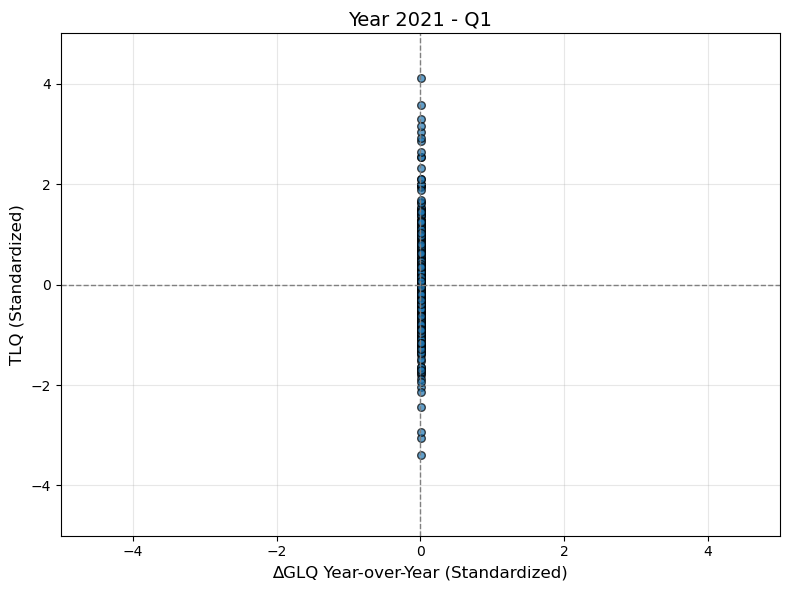

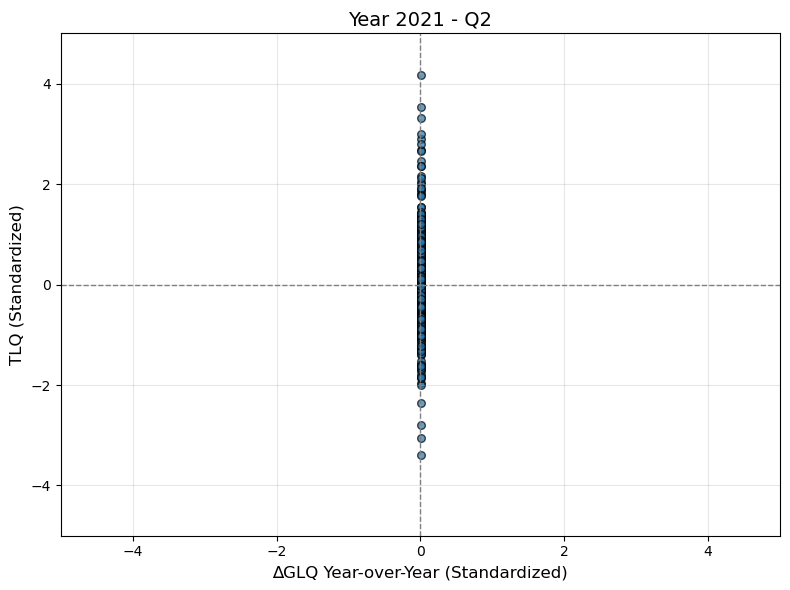

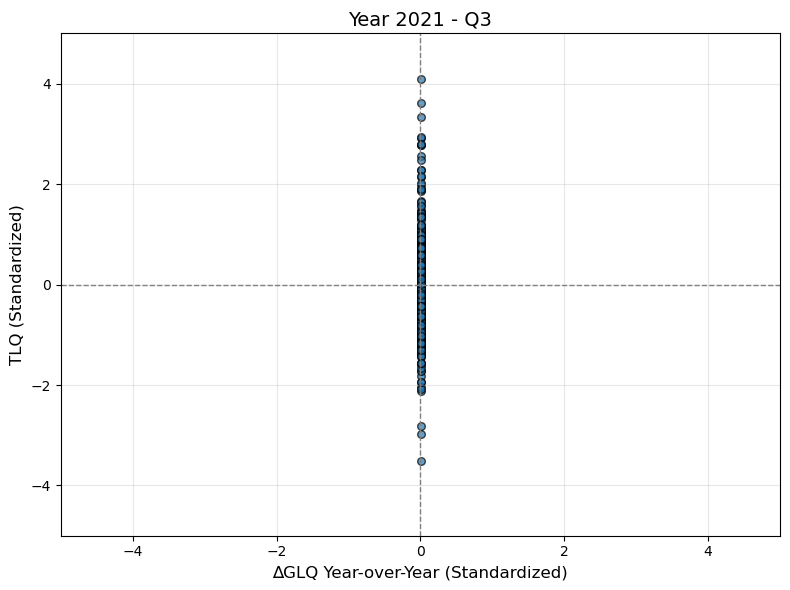

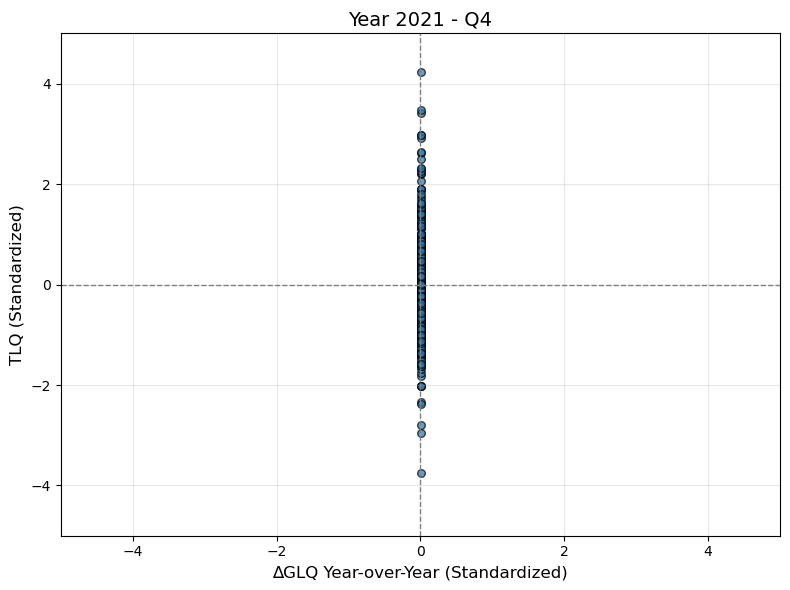

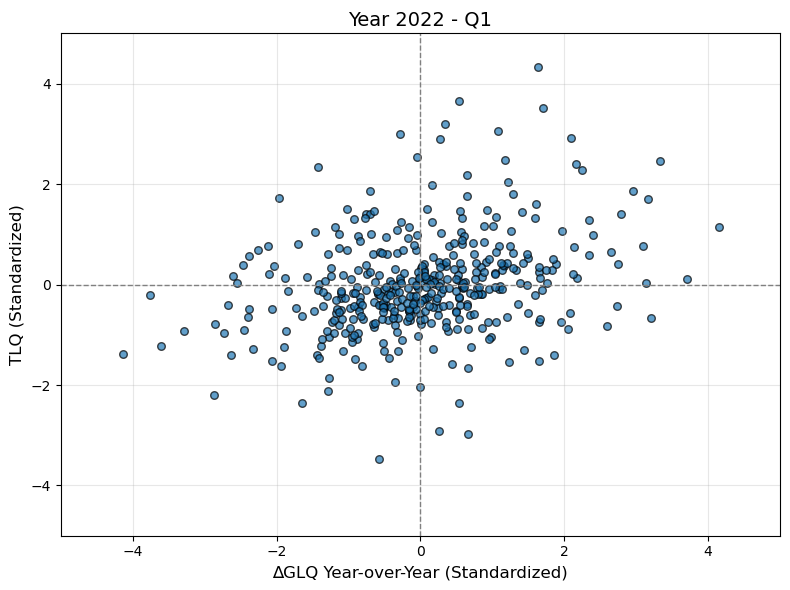

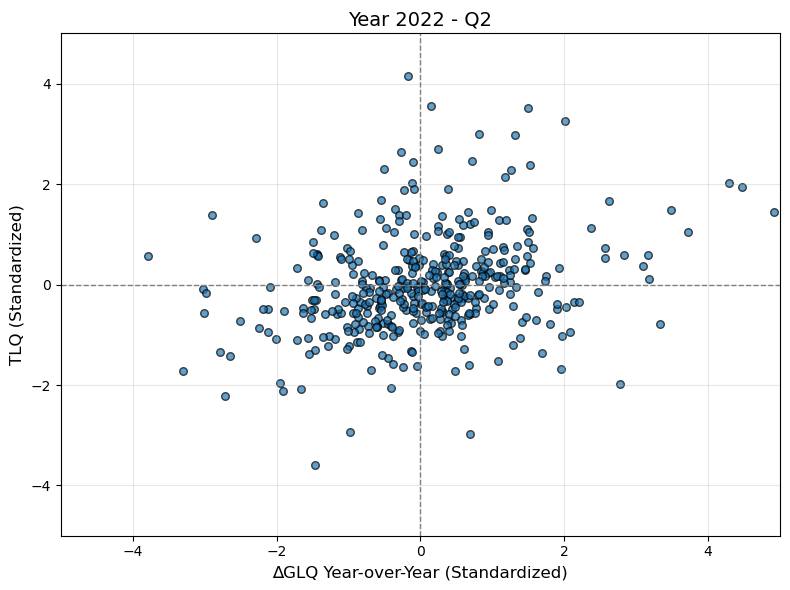

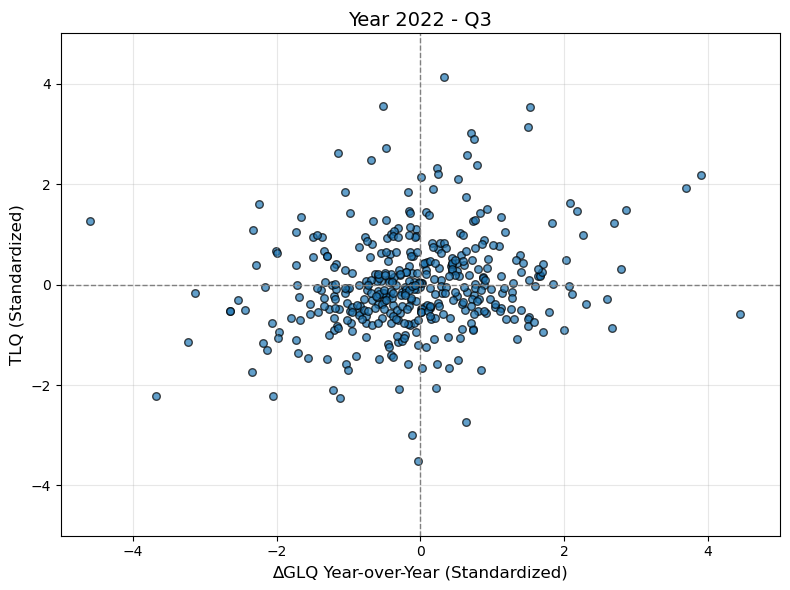

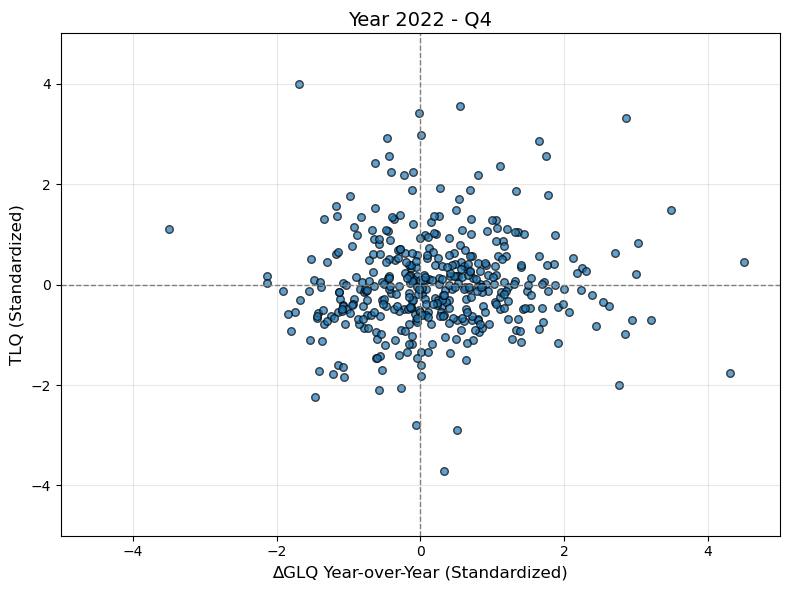

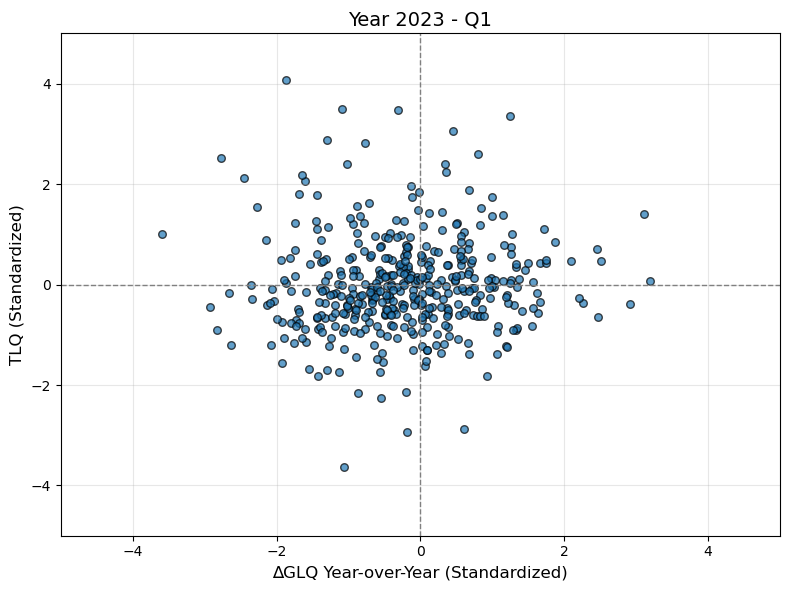

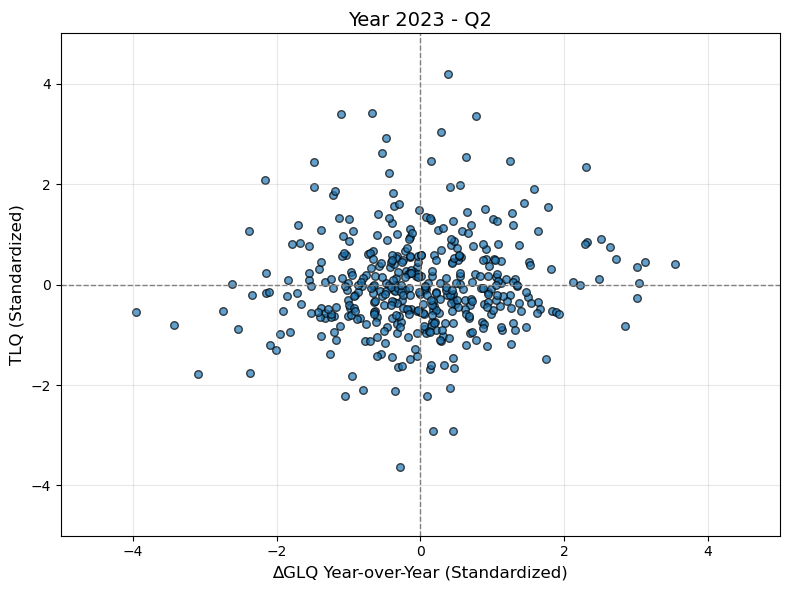

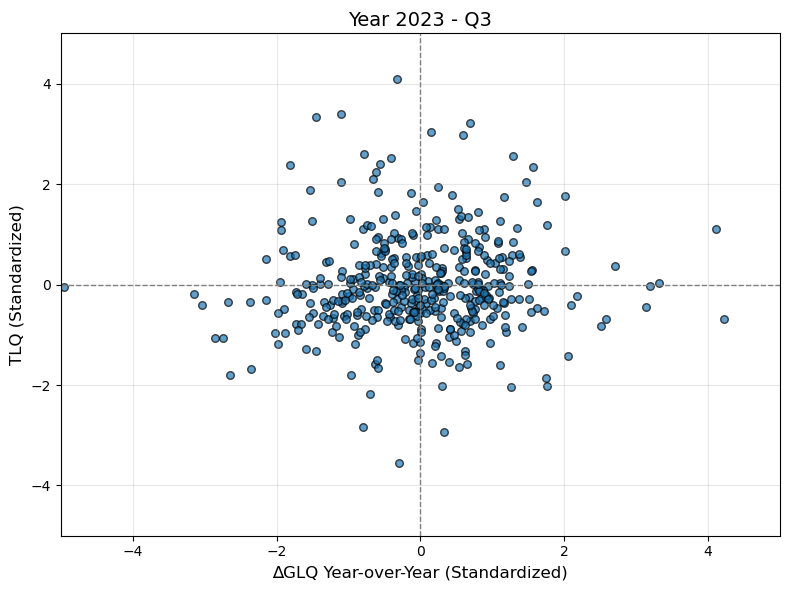

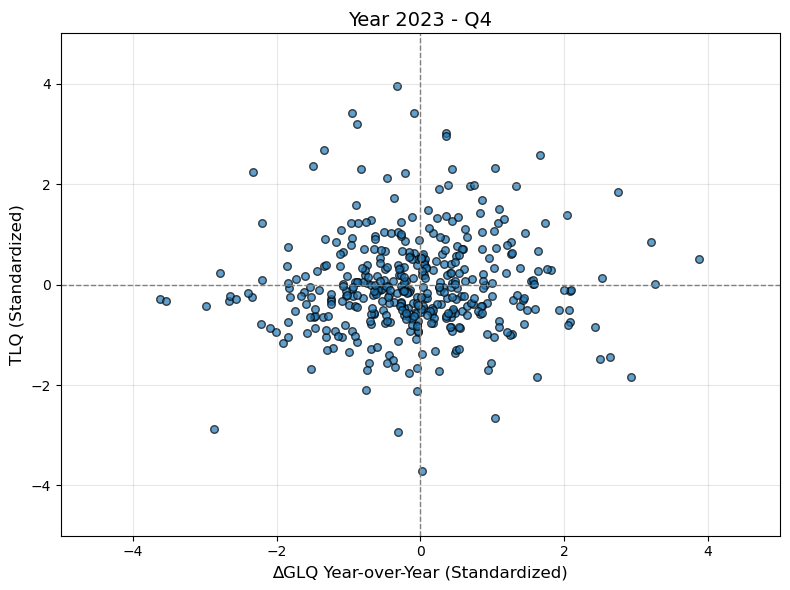

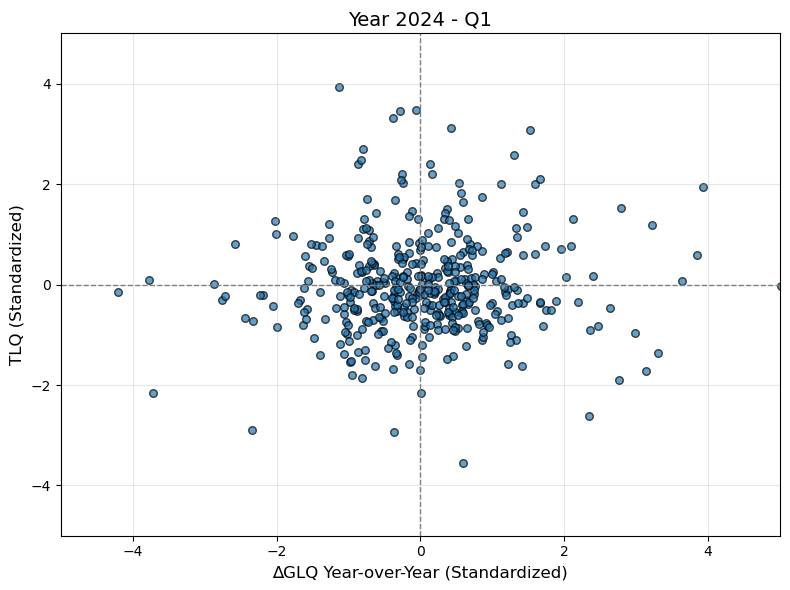

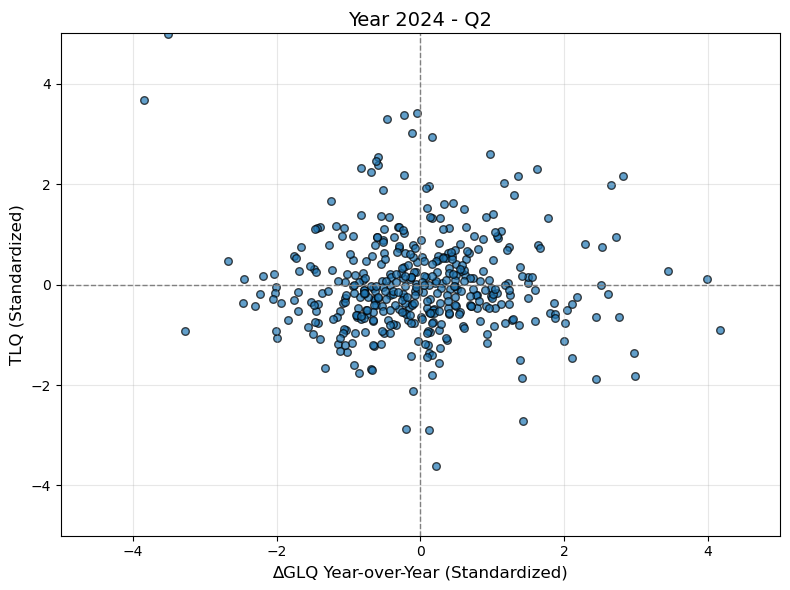

In [35]:
import matplotlib.pyplot as plt

# Define fixed axis limits for consistency
x_min, x_max = -5, 5  # Adjust these values as needed
y_min, y_max = -5, 5  # Adjust these values as needed

# Create separate figures for each quarter within each year
for year in sorted(unique_years):
    for qtr in sorted(unique_quarters):
        data = merged_df_sorted[(merged_df_sorted['year'] == year) & (merged_df_sorted['qtr'] == qtr)]
        
        if not data.empty:  # Proceed only if there is data for the current year and quarter
            plt.figure(figsize=(8, 6))
            plt.scatter(data['delta_glq_year'], data['tlq'], alpha=0.7, edgecolors='k', s=30)
            plt.title(f'Year {year} - Q{qtr}', fontsize=14)
            plt.xlabel('∆GLQ Year-over-Year (Standardized)', fontsize=12)
            plt.ylabel('TLQ (Standardized)', fontsize=12)
            plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
            plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
            plt.xlim(x_min, x_max)  # Fix x-axis limits
            plt.ylim(y_min, y_max)  # Fix y-axis limits
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()
